In [1]:
import numpy as np
from BiG import plotter as pl

# Examples for plotting bispectra with BiG

In this notebook we show how to visualize measured bispectra. For this we use bispectra measured in the BAHAMAS simulation (TheOne cosmology) with and without the BACCO BCM model. The measurements are given here as `bahamas_theone_L512_Nmesh512_bcm.dat` and `bahamas_theone_L512_Nmesh512_gro.dat`

## Loading data

First, we load the data and define the k-bins and k-binedges. For custom bins, these might have already been defined in a file similar to `test_customKbins.dat`.

In [2]:
# Loading bispectra
data_gro=np.loadtxt("bahamas_theone_L512_Nmesh512_bcm.dat")
data_bcm=np.loadtxt("bahamas_theone_L512_Nmesh512_gro.dat")

# Getting ks and kbinedges
kbins=np.linspace(0.01, 1.91, 10)
kbins_lower=kbins[:-1]
kbins_upper=kbins[1:]
kbins_mid=0.5*(kbins_lower+kbins_upper)

ks_low=[]
ks_high=[]

for i in range(9):
    k1_low=kbins_lower[i]
    k1_high=kbins_upper[i]
    for j in range(i,9):
        k2_low=kbins_lower[j]
        k2_high=kbins_upper[j]
        for k in range(j,9):
            k3_low=kbins_lower[k]
            k3_high=kbins_upper[k]
            if kbins_mid[k]<=kbins_mid[i]+kbins_mid[j]:
                ks_low.append([k1_low, k2_low, k3_low])
                ks_high.append([k1_high, k2_high, k3_high])

ks_low=np.array(ks_low)
ks_high=np.array(ks_high)



## Initializing Plotter

The plotter is initialized, and can take a colormap name as optional input. This colormap is used for all plots (unless overridden). The default colormap is `plasma`. We then add the measured bispectra, using the effective triangle edges

In [3]:
Plots=pl.plotter(cmap='plasma')
Plots.addBispectrum(ks=data_gro[:,3:6], kbinedges_low=ks_low, kbinedges_high=ks_high, bispec=data_gro[:,8], name='Gravity Only')
Plots.addBispectrum(ks=data_bcm[:,3:6], kbinedges_low=ks_low, kbinedges_high=ks_high, bispec=data_bcm[:,8], name='BCM')



## Plotting bispectra as 3D scatter plot

The easiest way to visualize (but not necessarily the easiest for comprehension)  the bispectrum is as a 3D scatter plot, with the values color-coded. The plotting routine needs the `vmin` and `vmax` parameters for the color coding. We can also give in the parameter `names` a list of which bispectra to show. 

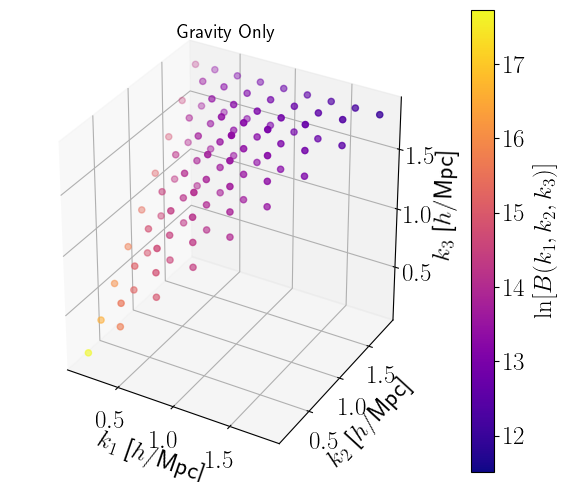

In [4]:
Plots.plotBispectrum3D(names=['Gravity Only'], vmin=np.log(1e5), vmax=np.log(5e7))

If we don't specify which bispectra to show, we will display all bispectra added to the plotter.

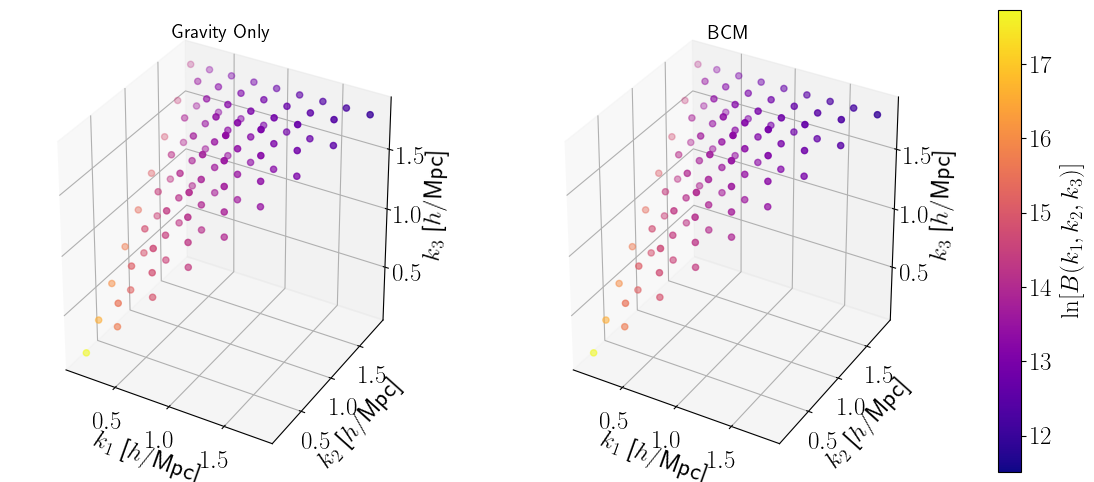

In [5]:
Plots.plotBispectrum3D(vmin=np.log(1e5), vmax=np.log(5e7))

## Plotting bispectra for fixed $k$-ratios

We can also show the bispectrum as a function of $k_3$ for fixed ratios of $k_1$ and $k_2$ to $k_3$. Note that we always assume $k_1\leq k_2\leq k_3$. The triangle in the lower left corner shows the triangle configuration, with the red edge corresponding to $k_3$. We can again give a list of names of bispectra to show.

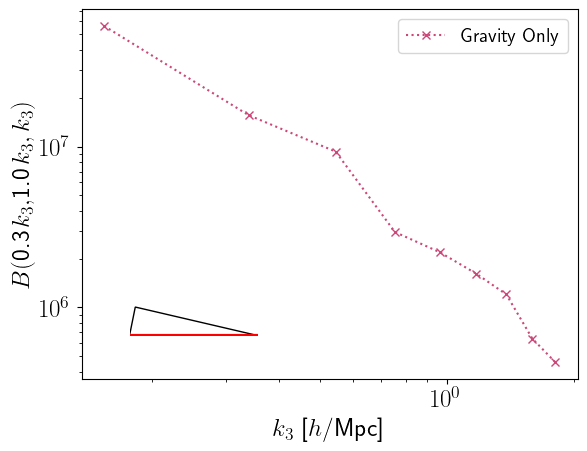

In [6]:
Plots.plotBispectrum1D(k1_k3=0.3, k2_k3=1., names=['Gravity Only'])


Again, giving no names will display all bispectra together

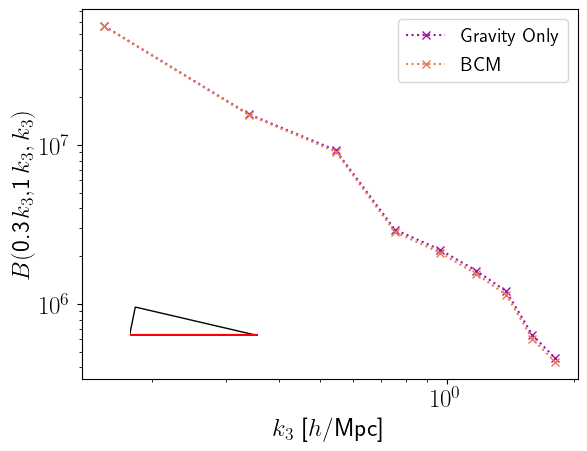

In [7]:
Plots.plotBispectrum1D(k1_k3=0.3, k2_k3=1)


We can also give custom colors and markers

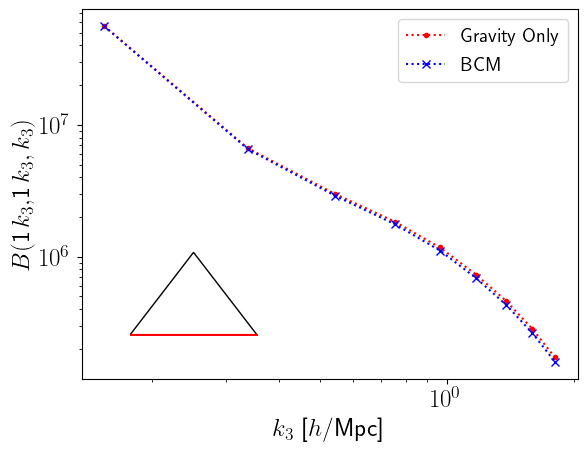

In [8]:
Plots.plotBispectrum1D(k1_k3=1, k2_k3=1, markers=['.', 'x'], colors=['r', 'b'])


## Plotting bispectra for fixed $k_3$

We can also show the bispectrum as a function of the ratios of $k_1$ and $k_2$ to $k_3$ for fixed $k_3$s. We need to specify the `vmin` and `vmax` parameters for the color coding. 

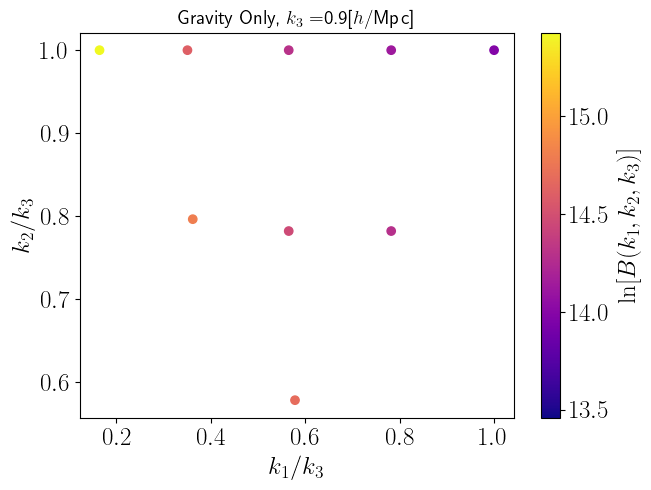

In [9]:
Plots.plotBispectrumTriangle(0.9, names=['Gravity Only'], vmin=np.log(7e5), vmax=np.log(5e6))


Again, giving no names will display all bispectra

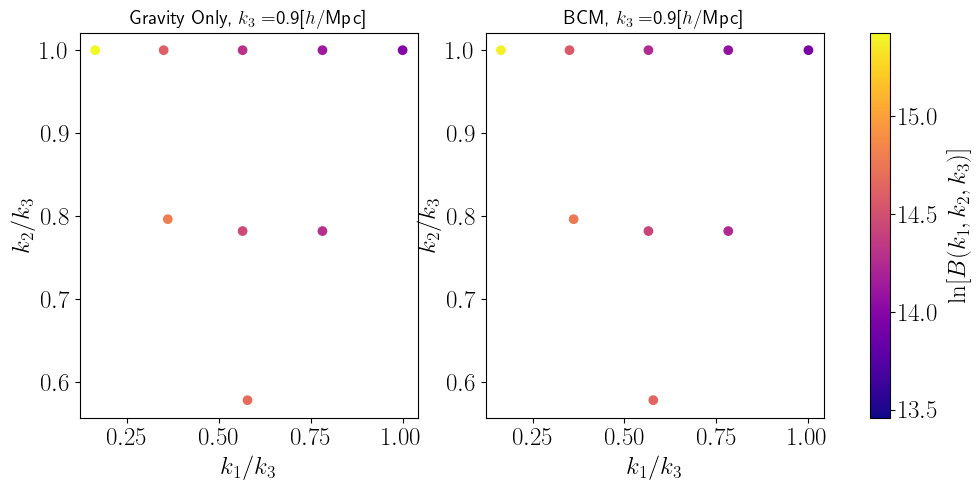

In [10]:
Plots.plotBispectrumTriangle(0.9, vmin=np.log(7e5), vmax=np.log(5e6))


## Plotting bispectra for fixed $k_3$ with binsizes

Finally, we can plot the bispectrum for fixed $k_3$ including the size of the bins used. In this plot, the rectangles correspond to the bins. The black crosses indicate the effective triangles / bin centers. The options are the same as for `plotBispectrumTriangle`.

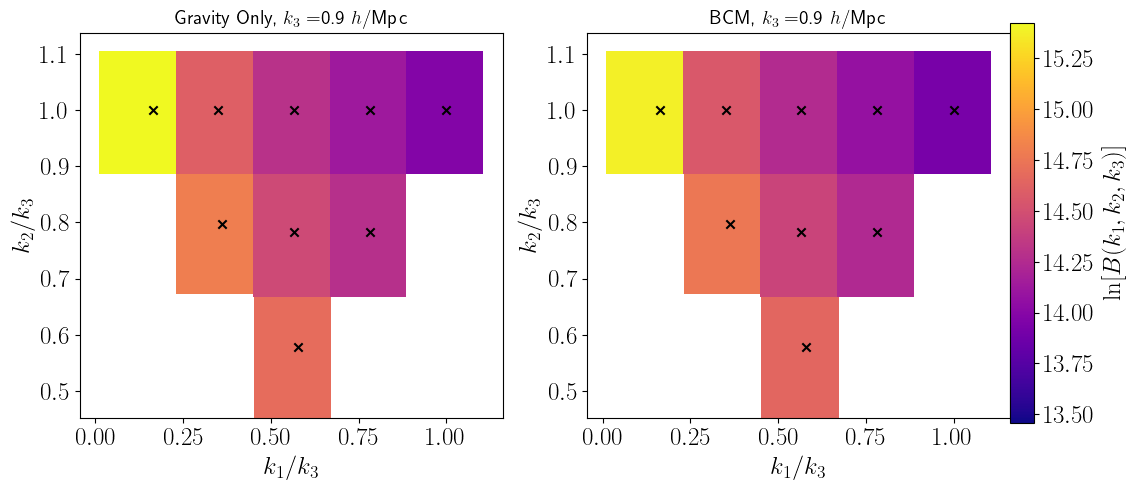

In [11]:
Plots.plotBispectrumTriangleBinsize(0.9,  vmin=np.log(7e5), vmax=np.log(5e6))

## Saving figures

Figures will be saved, if an output file name is specified in the plotting call.

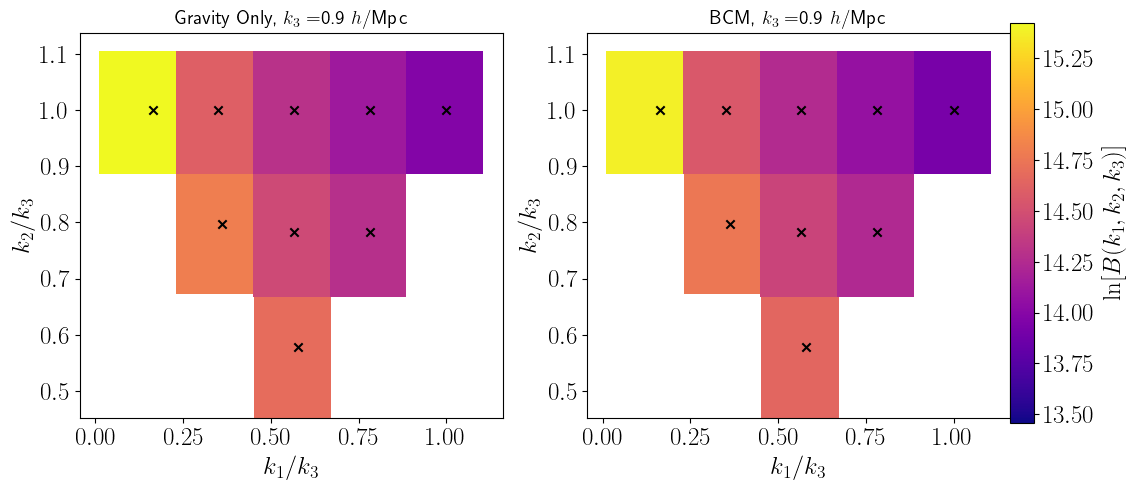

In [12]:
Plots.plotBispectrumTriangleBinsize(0.9,  vmin=np.log(7e5), vmax=np.log(5e6), outputFn="TestPlot.png")
